In [1]:
pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime, date
end = date.today()
start =datetime(end.year-20,end.month,end.day)

In [4]:
# Get user input for stock ticker and date range
stock = input("Enter the stock ticker (e.g., 'ADANIENT.NS'): ")
start =datetime(end.year-20,end.month,end.day)
end = date.today()

data=yf.download(stock,start,end)

Enter the stock ticker (e.g., 'ADANIENT.NS'): GOOG


[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2004-11-02 00:00:00+00:00,4.841668,4.853558,4.962649,4.815451,4.950943,455553149
2004-11-03 00:00:00+00:00,4.762161,4.773856,5.021179,4.750942,4.935999,557630330
2004-11-04 00:00:00+00:00,4.588987,4.600257,4.742225,4.566633,4.693408,578544429
2004-11-05 00:00:00+00:00,4.207606,4.217940,4.540481,4.198015,4.532511,796297573
2004-11-08 00:00:00+00:00,4.287112,4.297641,4.369622,4.219185,4.257293,449349985


In [6]:
data.shape

(5035, 6)

In [7]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,47.182452,47.292679,47.771535,46.801783,47.274875,1.121183e+08
std,45.099132,45.194677,45.666140,44.726209,45.171961,1.452657e+08
min,4.102013,4.112087,4.221676,4.017691,4.096396,1.584340e+05
25%,13.178990,13.211356,13.367271,13.085328,13.232028,2.676500e+07
50%,27.616179,27.684000,27.843555,27.444252,27.723885,5.225915e+07
75%,61.993006,62.145250,62.722475,61.621450,62.108000,1.366864e+08
max,192.406723,192.660004,193.309998,190.619995,191.750000,1.650833e+09


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2004-11-02 00:00:00+00:00 to 2024-11-01 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5035 non-null   float64
 1   (Close, GOOG)      5035 non-null   float64
 2   (High, GOOG)       5035 non-null   float64
 3   (Low, GOOG)        5035 non-null   float64
 4   (Open, GOOG)       5035 non-null   float64
 5   (Volume, GOOG)     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [9]:
data.isna().sum()

,,0
Price,Ticker,
Adj Close,GOOG,0
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'closing price of google data')

<Figure size 1500x500 with 0 Axes>

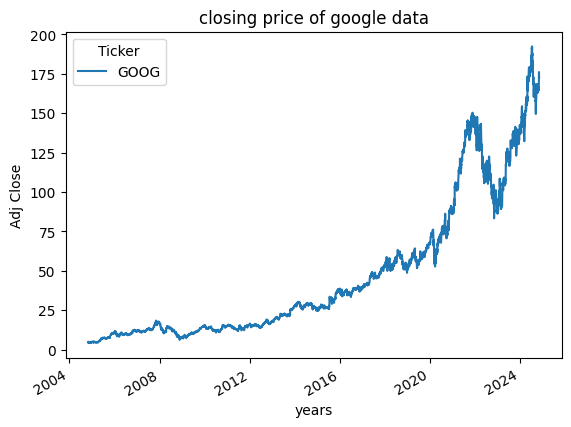

In [11]:
plt.figure(figsize=(15,5))
data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Adj Close")
plt.title("closing price of google data")

In [12]:
def plot_graph(figsize,values,column_name):
  plt.figure()
  values.plot(figsize=figsize)
  plt.xlabel("years")
  plt.ylabel(column_name)
  plt.title(f"{column_name} of {stock} data")

In [13]:
data.columns

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

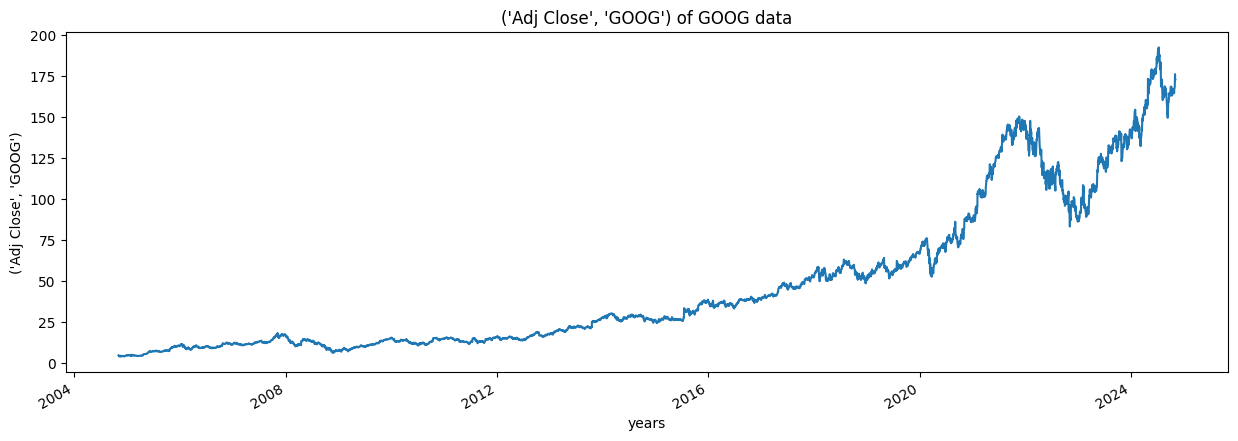

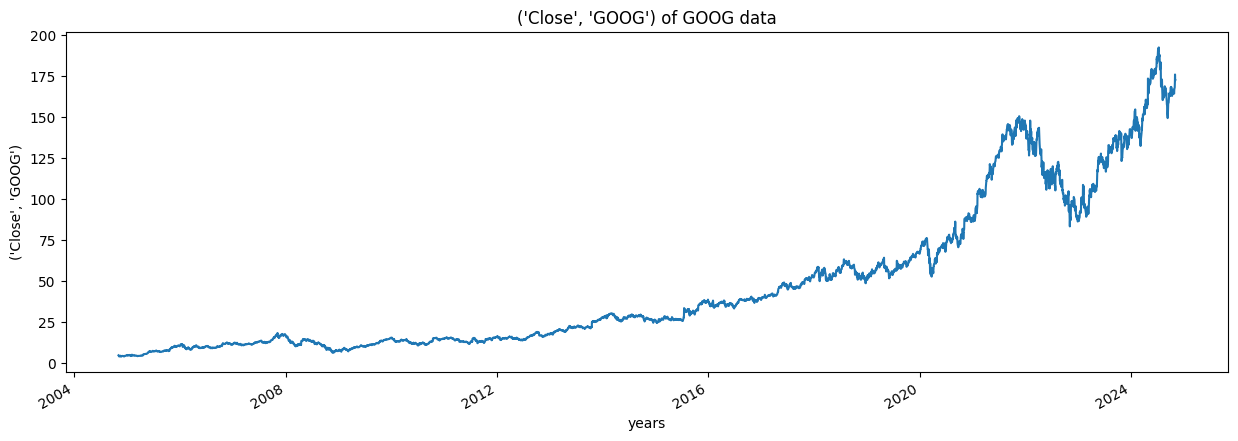

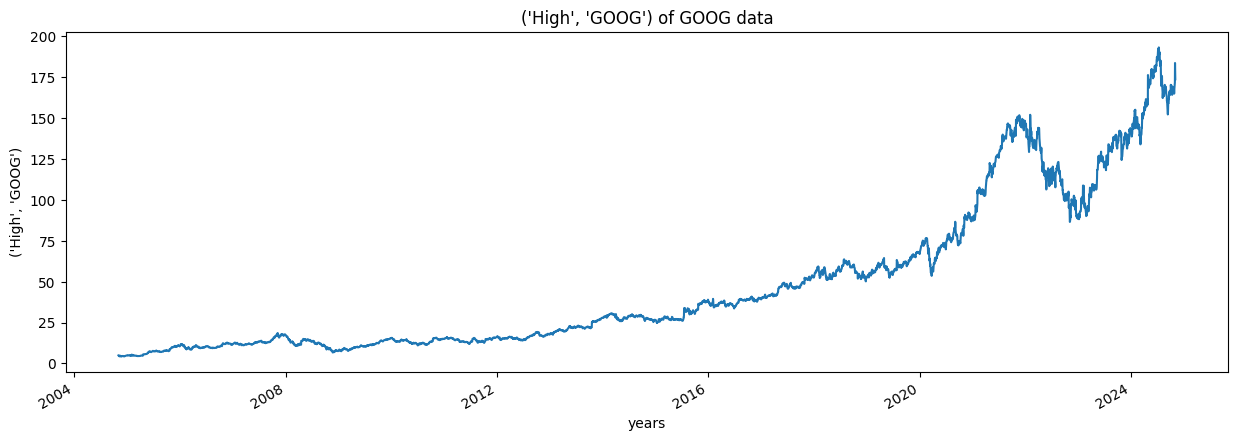

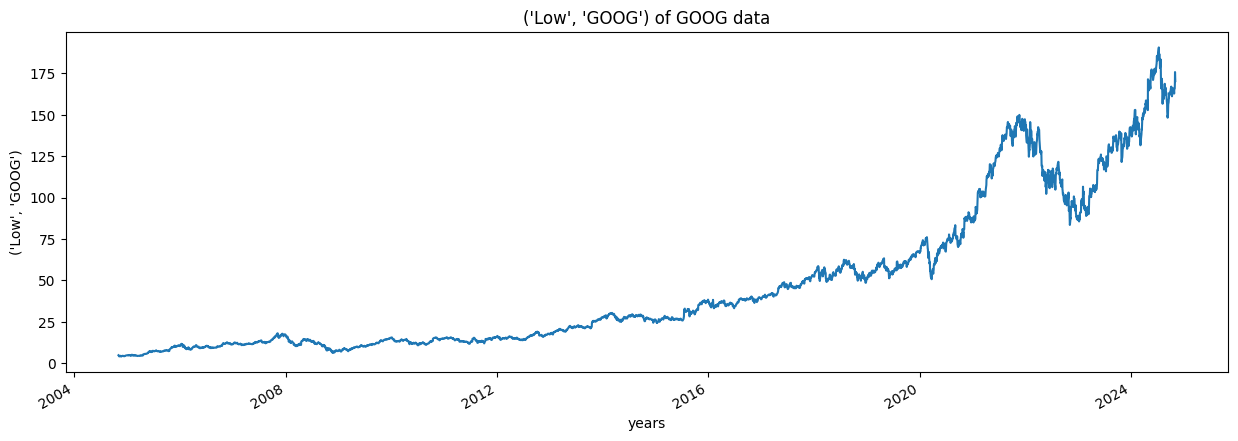

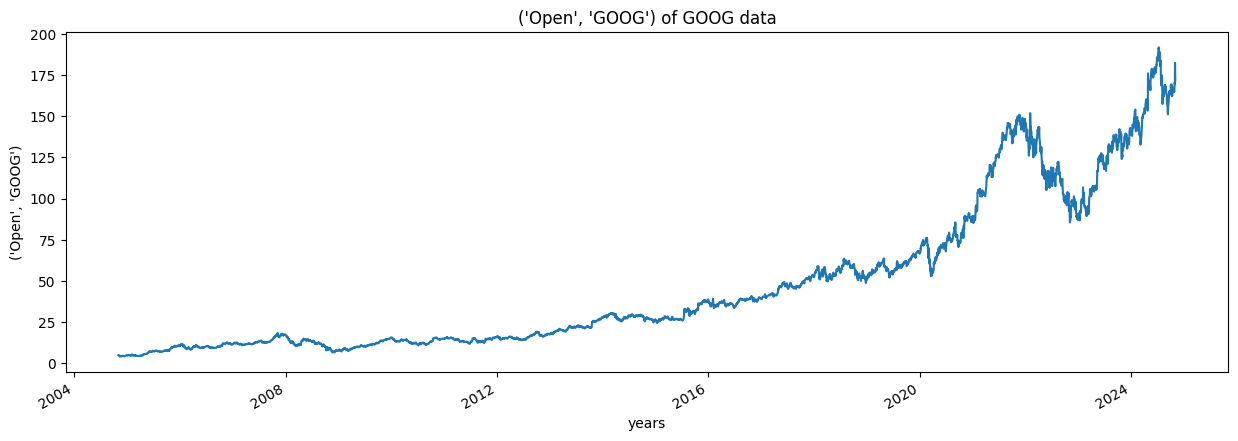

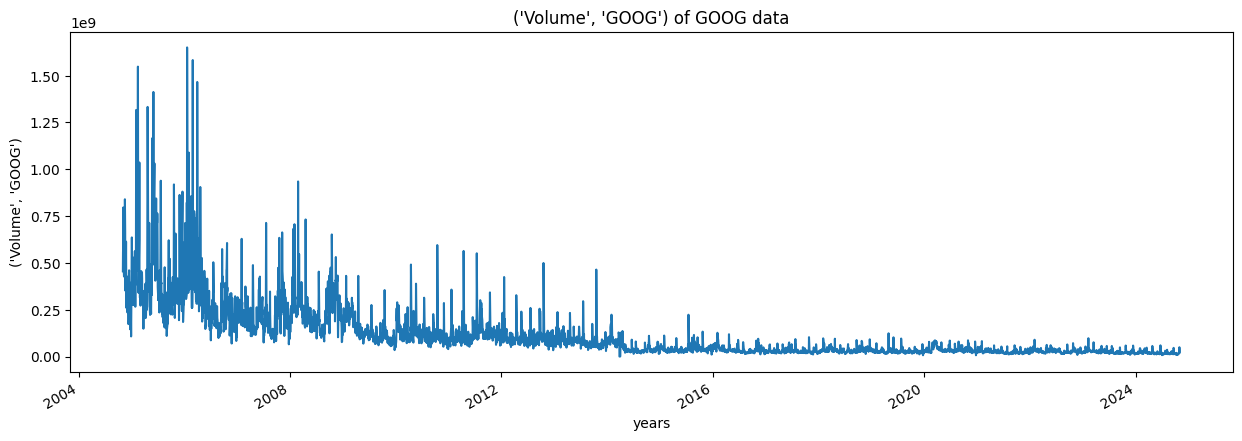

In [14]:
for column in data.columns:
  plot_graph((15,5),data[column],column)

In [15]:
for i in range (2004,2024):
  print(i,list(data.index.year).count(i))

2004 42
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [16]:
data['MA_for_250_days']=data['Adj Close'].rolling(250).mean()

In [17]:
data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2005-10-21 00:00:00+00:00,NaN
2005-10-24 00:00:00+00:00,NaN
2005-10-25 00:00:00+00:00,NaN
2005-10-26 00:00:00+00:00,NaN
2005-10-27 00:00:00+00:00,5.924734


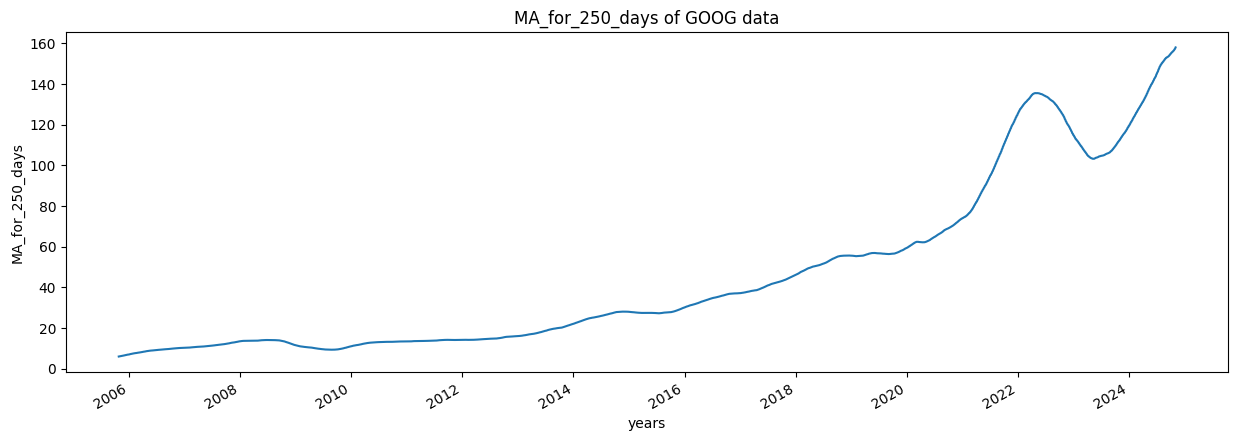

In [18]:
plot_graph((15,5),data['MA_for_250_days'],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

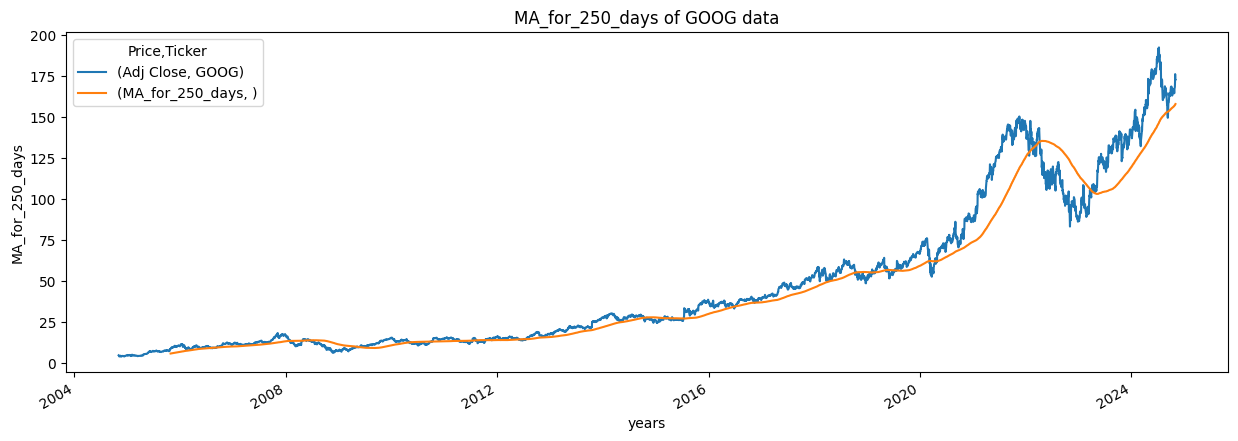

In [19]:
plot_graph((15,5),data[['Adj Close','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

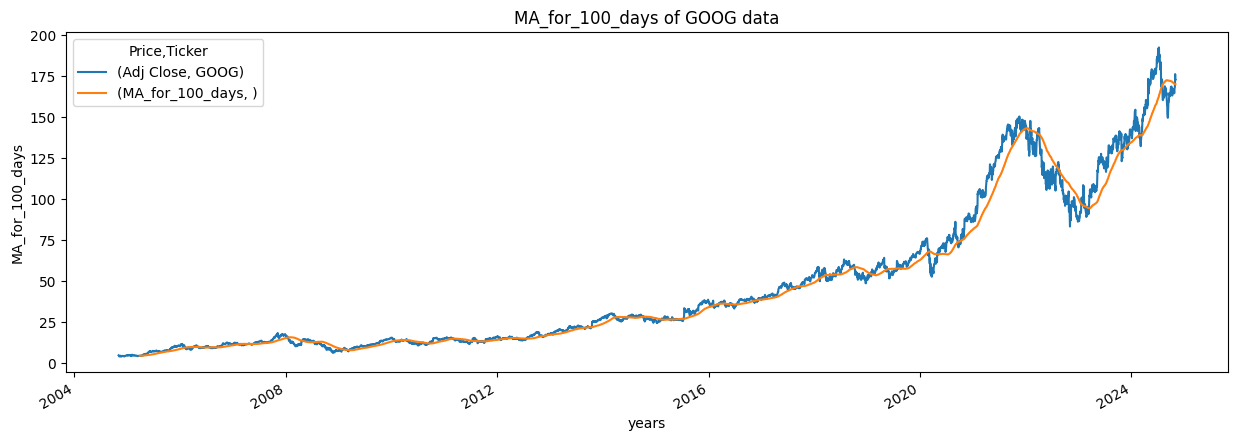

In [20]:
data['MA_for_100_days']=data['Adj Close'].rolling(100).mean()
plot_graph((15,5),data[['Adj Close','MA_for_100_days']],'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

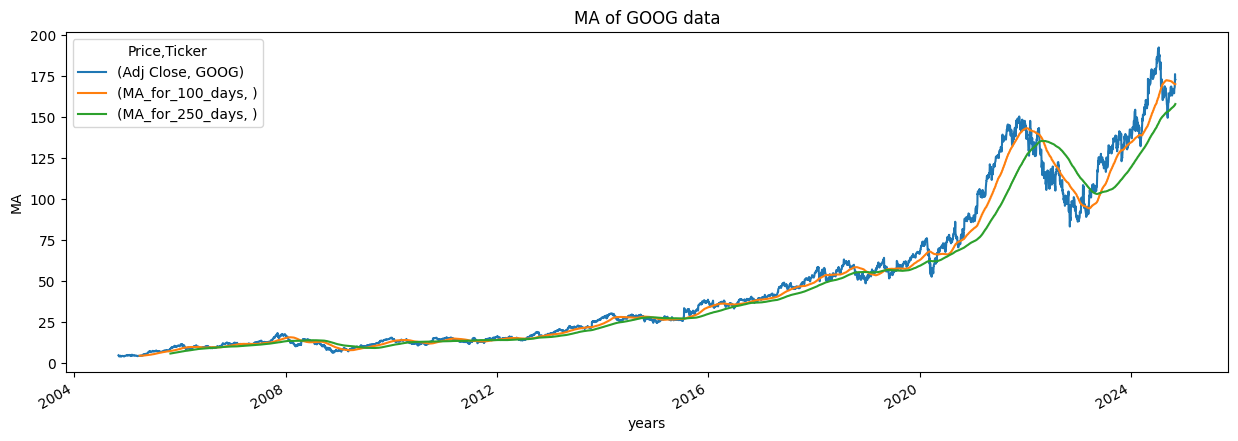

In [21]:
plot_graph((15,5),data[['Adj Close','MA_for_100_days','MA_for_250_days']],'MA')

In [22]:
data['percentage_change_cp'] = data['Adj Close'].pct_change()
data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,GOOG,
Date,,
2004-11-02 00:00:00+00:00,4.841668,NaN
2004-11-03 00:00:00+00:00,4.762161,-0.016421
2004-11-04 00:00:00+00:00,4.588987,-0.036364
2004-11-05 00:00:00+00:00,4.207606,-0.083108
2004-11-08 00:00:00+00:00,4.287112,0.018896


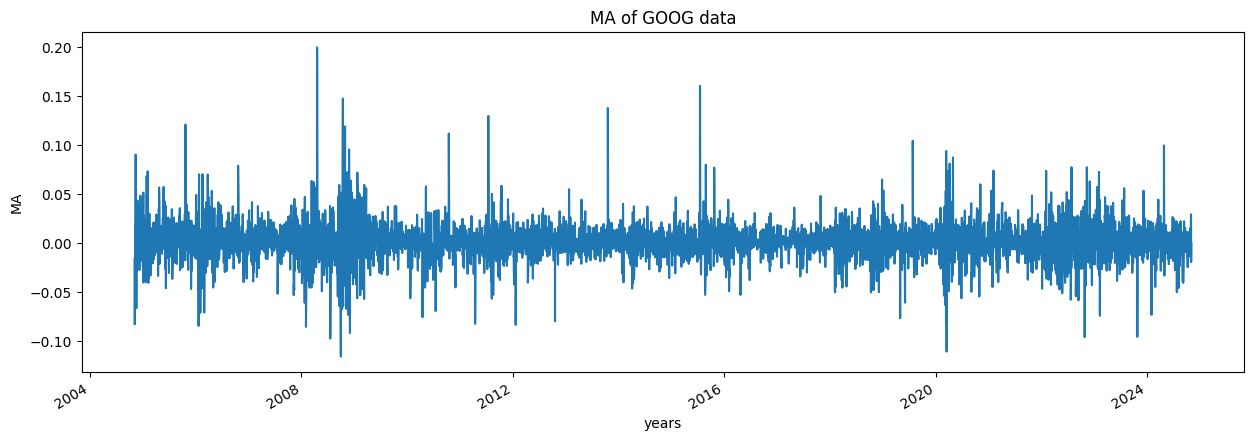

In [23]:
plot_graph((15,5),data['percentage_change_cp'],'MA')

In [24]:
Adj_close_price = data[['Adj Close']]

In [25]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.40672302]), array([4.10201311]))

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)

In [27]:
scaled_data

array([[0.00392797],
       [0.00350574],
       [0.0025861 ],
       ...,
       [0.91361489],
       [0.89529353],
       [0.89508107]])

In [28]:
len(scaled_data)

5035

In [29]:
x_data=[]
y_data=[]

for i in range(100,len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i,0])

In [30]:
import numpy as np

x_data , y_data = np.array(x_data) , np.array(y_data)

In [31]:
x_data[0],y_data[0]

(array([[0.00392797],
        [0.00350574],
        [0.0025861 ],
        [0.00056076],
        [0.00098298],
        [0.000475  ],
        [0.00036416],
        [0.00236443],
        [0.00222985],
        [0.00260853],
        [0.00098166],
        [0.00097638],
        [0.00032194],
        [0.00056736],
        [0.        ],
        [0.0003193 ],
        [0.00127457],
        [0.00188548],
        [0.0021045 ],
        [0.00222721],
        [0.00196069],
        [0.0018868 ],
        [0.00201874],
        [0.00147645],
        [0.0008352 ],
        [0.00064388],
        [0.00109909],
        [0.00086423],
        [0.0007059 ],
        [0.00179312],
        [0.00193693],
        [0.0015002 ],
        [0.00197651],
        [0.00262832],
        [0.00246075],
        [0.00279721],
        [0.00300831],
        [0.00353741],
        [0.00364957],
        [0.00366804],
        [0.00428817],
        [0.00365352],
        [0.00496241],
        [0.00387914],
        [0.00374852],
        [0

In [32]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3454, 100, 1)
(3454,)
(1481, 100, 1)
(1481,)


In [34]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [35]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.compile(optimizer='adam' , loss='mean_squared_error')

In [37]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

3454/3454 ━━━━━━━━━━━━━━━━━━━━ 322s 92ms/step - loss: 3.6065e-04


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [39]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step


In [40]:
predictions

array([[0.25873488],
       [0.2582759 ],
       [0.2564816 ],
       ...,
       [0.82441986],
       [0.83450645],
       [0.8411758 ]], dtype=float32)

In [41]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 52.82301 ],
       [ 52.736584],
       [ 52.398705],
       ...,
       [159.34415 ],
       [161.2435  ],
       [162.49937 ]], dtype=float32)

In [42]:
# Reshape y_test to a 2D array before applying inverse_transform
inv_y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
inv_y_test

array([[ 51.97735214],
       [ 50.70198441],
       [ 51.30949402],
       ...,
       [176.13999939],
       [172.69000244],
       [172.6499939 ]])

In [44]:
import pandas as pd

ploting_data = pd.DataFrame(
    {
        'original_test_data' : inv_y_test.reshape(-1),
        'predictions' : inv_predictions.reshape(-1)

    },
    index = data.index[splitting_len+100:]


)

In [45]:
ploting_data.head()

,original_test_data,predictions
Date,,
2018-12-14 00:00:00+00:00,51.977352,52.823009
2018-12-17 00:00:00+00:00,50.701984,52.736584
2018-12-18 00:00:00+00:00,51.309494,52.398705
2018-12-19 00:00:00+00:00,51.025192,52.104698
2018-12-20 00:00:00+00:00,50.346855,51.830982


<Figure size 640x480 with 0 Axes>

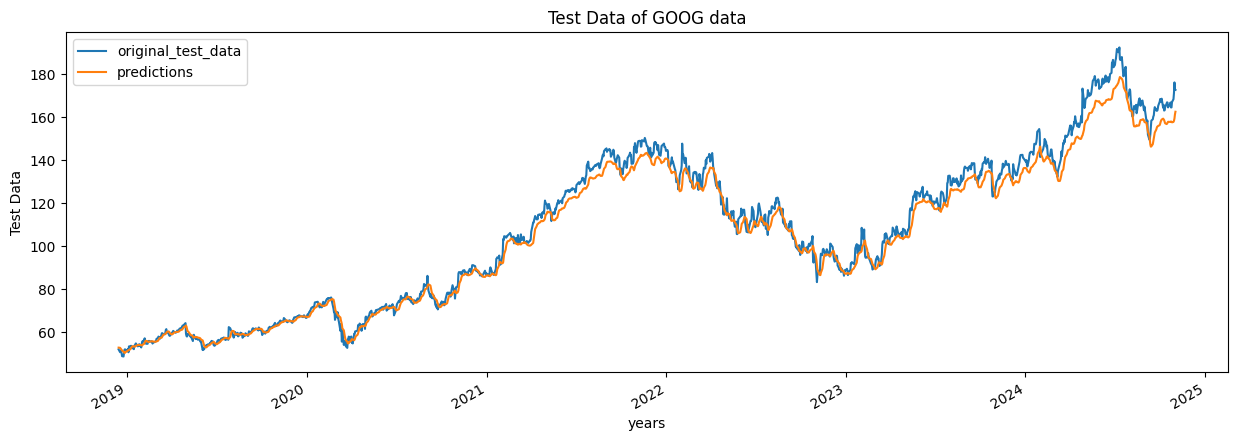

In [46]:
plot_graph((15,5),ploting_data,'Test Data')

<Figure size 640x480 with 0 Axes>

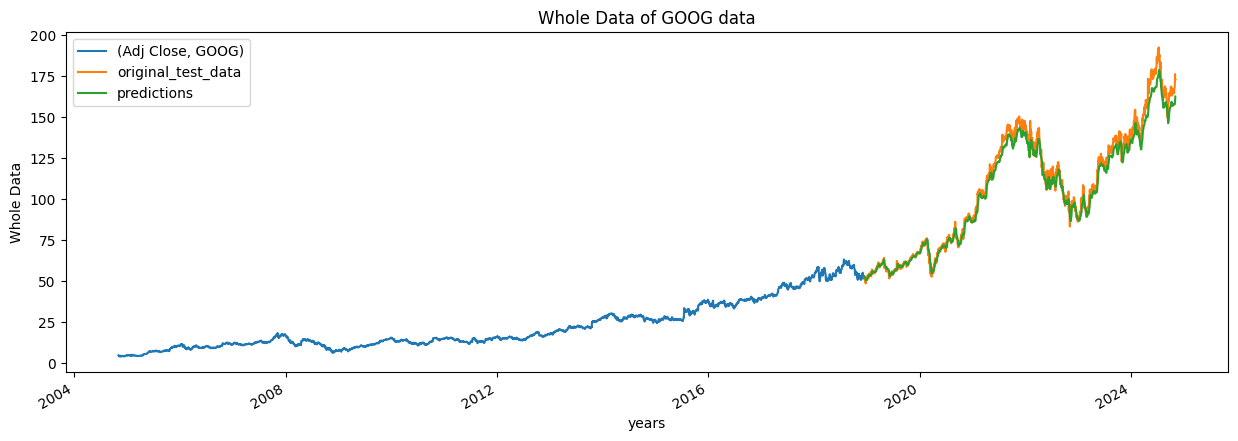

In [47]:
plot_graph((15,5),pd.concat([Adj_close_price[:splitting_len+100],ploting_data],axis=0),'Whole Data')

In [48]:
model.save("Latest_stock_price_model.LSTM.keras")

In [ ]:
rmse = np.sqrt(np.mean(((inv_predictions - inv_y_test) ** 2).mean()))
rmse

4.900006041926825